## PART A: DATA ANALYSIS


### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('tableau-colorblind10')




### **Initial Analysis of data**


Here we observe that:
- The data has no null values so no need to handle it
- The features are obtained using PCA to protect privacy of data and so they must have been scaled already.
- The only features to be scaled are Time and Amount which are scaled using min-max and standard scalings respectively.
- We also observe that the dataset is heavily imbalanced with about 99.8% of data being Non-fraudulent transactions and hence there is a need to augment the Fraud data.

In [2]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- The shape of df is (284807, 31)

- The number of null values is  0

- Getting the datatypes of the df
float64    30
int64       1
Name: count, dtype: int64

- Distribution of target class Class
0    284315
1       492
Name: count, dtype: int64

 No. of Legitimate transactions: 0.1727485630620034 %

 No. of Legitimate transactions: 99.82725143693798 %


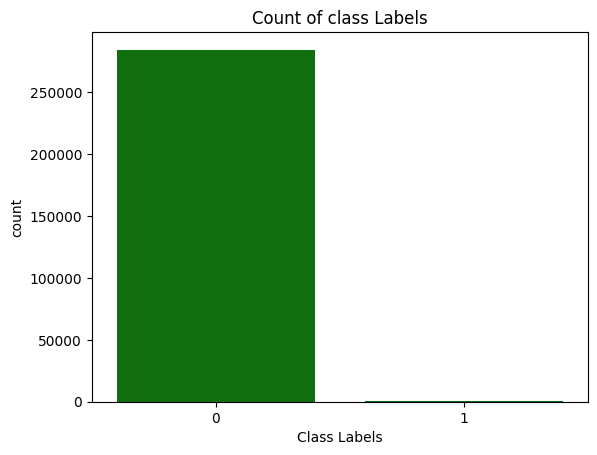

In [5]:
print("- The shape of df is",df.shape)

print("\n- The number of null values is ",df.isnull().sum(axis=0).max())

print("\n- Getting the datatypes of the df")
print(df.dtypes.value_counts())

print("\n- Distribution of target class",df["Class"].value_counts())
print(f"\n No. of Legitimate transactions: {(df['Class'].sum()/len(df["Class"]))*100} %")
print(f"\n No. of Legitimate transactions: {(1-df['Class'].sum()/len(df["Class"]))*100} %")

sns.countplot(x='Class', data=df,color='green')
plt.gca().set(title="Count of class Labels", xlabel="Class Labels")  # gca is get current axis; only axis can handle 'set' functions4
plt.show()


### **Preparation of Datasets**

- Here we first seperate the dataset into train (80%) and test (20%) such that the proportions of class labels are same in boths sets. This is done using the StratifiedKFold function from sklearn library
- The train dataset is further used to get 2 refined datasets, one with only fraud data and other with only legit data. These datasets will be used further for augmentation
- We also confirm the proportions of test and train data from the outputs given below


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score,precision_score,f1_score,accuracy_score,confusion_matrix,classification_report,recall_score

# This is a way to split the data into 5 folds such that each has same proportion(ratio) of target classes. Works only for categorial class variables.
# This can be done in manual way too by segregating the classes, splitting them all and combining them back and use test train split
# Here, the dataset is split into 5 parts with same distribution, then one part is considered the test and the rest the training
# This returns an iterator of length 5, each with a tuple of indices for test and train. So the 5 loop is such that one fold gets to be the test set once.

# for oru purpose only one loop is enough
df['Time']=MinMaxScaler().fit_transform(np.array(df['Time']).reshape(-1,1))
df['Amount']=StandardScaler().fit_transform(np.array(df['Amount']).reshape(-1,1))
ssk=StratifiedKFold(n_splits=5,shuffle=True,random_state=19)


X=df.drop(columns='Class')
Y=df['Class']

arr=ssk.split(X,Y)
train_i,test_i=next(arr)

train_df=df.iloc[train_i]
test_df=df.iloc[test_i]
X_train=X.iloc[train_i]
X_test=X.iloc[test_i]
Y_train=Y.iloc[train_i]
Y_test=Y.iloc[test_i]

print("\nPrepared the training and test sets..... and the size of test is  ", len(X_test), " and train is ", len(X_train))

# Dataset with only Fraud transactions excluding the test set
df_fraud=train_df[train_df["Class"]==1]

X_fraud=df_fraud.drop(columns='Class')
Y_fraud=df_fraud['Class']

print("\nPrepared the Fraud only dataset..... and the size is ",len(X_fraud))

# Dataset with only Legit transactions excluding the test set

df_legit=train_df[train_df["Class"]==0]

X_legit=df_legit.drop(columns="Class")
Y_legit=df_legit['Class']

print("\nPrepared the Legit only dataset..... and the size is ",len(X_legit))


original_count=df['Class'].value_counts()
test_count=Y.value_counts()

print(f"\nThe proportion of classes in original dataset is {original_count[0]/original_count[1]*100} and that of test set is {test_count[0]/test_count[1]*100}")






Prepared the training and test sets..... and the size of test is   56962  and train is  227845

Prepared the Fraud only dataset..... and the size is  393

Prepared the Legit only dataset..... and the size is  227452

The proportion of classes in original dataset is 57787.60162601626 and that of test set is 57787.60162601626


### **Function for model training and evaluation**

- Below is a function that takes in train and test data and evaluates the metrics.
- Our aim here will be to get different datasets from augmentation and then pass them into this function to train, keeping the test set same.
- The function calculates the accuracy, precision, recall, F1 score, ROC-AUC score and plots the confusion matrix

--- 
#### **Why Precision, Recall, and F1-Score Matter More than Accuracy**

- **Accuracy is misleading in imbalanced data:**  
  - In fraud detection, fraudulent cases form only a tiny fraction of all transactions.  
  - A model that predicts “non-fraud” for every transaction will still achieve very high accuracy (close to 99%), but it will **completely fail to detect fraud**.  

- **Precision (for the minority class):**  
  - Precision measures the proportion of predicted fraud cases that are actually fraud.  
  - High precision means fewer false alarms, which is important because flagging too many genuine transactions can frustrate customers and waste resources.  

- **Recall (for the minority class):**  
  - Recall measures the proportion of actual fraud cases that the model successfully detects.  
  - High recall is critical in fraud detection because **missing a fraudulent transaction is very costly**.  

- **F1-score:**  
  - The F1-score is the harmonic mean of precision and recall.  
  - It balances the trade-off: a model with high recall but very low precision (or vice versa) is not ideal.  
  - The F1-score ensures the model performs reasonably well on both aspects.  


- Accuracy alone hides the real performance on rare fraud cases.  
- Precision, Recall, and F1-score directly measure the classifier’s ability to handle the **minority class**, which is the real goal in fraud detection.  


In [49]:
acc=[]
pres=[]
recall=[]
f1=[]
auc=[]

def model_evaluation(X_train,Y_train,X_test,Y_test,name: str):

    print("\nTraining and evaluation initiated for ",name," .....\n")
    reg=LogisticRegression().fit(X_train,Y_train)

    Y_pred=reg.predict(X_test)
    Y_probab=reg.predict_proba(X_test)[:,1]

    print("\nAccuracy:",accuracy_score(Y_test,Y_pred))
    acc.append(accuracy_score(Y_test,Y_pred))
    print("\nPrecision:",precision_score(Y_test,Y_pred))
    pres.append(precision_score(Y_test,Y_pred))
    print("\nRecall:",recall_score(Y_test,Y_pred))
    recall.append(recall_score(Y_test,Y_pred))
    print("\nF1 score:",f1_score(Y_test,Y_pred))
    f1.append(f1_score(Y_test,Y_pred))



    print("\nROC AUC Score:",roc_auc_score(Y_test,Y_probab))
    auc.append(roc_auc_score(Y_test,Y_pred))


    sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,fmt='d',yticklabels=["Actual Legit","Actual Fraud"],xticklabels=["Predicted Legit"," Predicted Fraud"])
    # fmt ensures the numbers are represented as whole and not in scientific notation
    plt.title("Confusion Matrix "+ name)
    plt.show()
    # print("\n",classification_report(Y_test,Y_pred))





## PART B: DATA AUGMENTATION

- Our goal here is to generate 2 sets of data
- The first set is such that the fraud data is upsampled using Gaussian Mixture model which makes the data 50% fraud and 50% Legit, doubling the dataset size
- The second set is such that the fraud data is upsampled to a suitable number and then the legit data is undersampled using clustering models which results in smaller dataset that captures all the patterns and nuances from the initial large dataset
---


### **THEORETICAL FOUNDATIONS**

#### **Fundamental Difference: GMM-Based Synthetic Sampling vs. SMOTE**

- **SMOTE (Synthetic Minority Oversampling Technique):**  
  - SMOTE generates synthetic samples by interpolating between existing minority samples.  
  - It assumes that the minority class lies in a continuous, convex space, and new points are created along line segments joining nearest neighbors.  
  - While simple and effective, SMOTE does not account for underlying probability distributions or multi-modal structures.  
  - As a result, it may create unrealistic points, especially when the minority class has clusters, complex shapes, or overlaps with the majority class.  

- **GMM-Based Synthetic Sampling:**  
  - Gaussian Mixture Models (GMMs) are probabilistic generative models that represent data as a mixture of multiple Gaussian distributions.  
  - Fitting a GMM on the minority class allows the model to capture multiple modes (clusters), variances, and correlations in the data.  
  - Synthetic samples are generated by sampling from the fitted probability distribution, making them statistically consistent with the observed minority data.  
  - Unlike SMOTE, GMM-based sampling can handle complex, non-linear feature spaces and preserve the true structure of fraud transactions.  

####  **Why GMM is Theoretically Better**  

- The minority class (fraud cases) may not form one single cluster – it can have multiple sub-groups with different patterns.  
- GMM (Gaussian Mixture Model) can represent this by using several Gaussian components, each capturing one subgroup.  
- Each component models not only the center of a subgroup but also its spread and shape, which makes it flexible for complex data.  
- Since GMM is a probabilistic model, the synthetic samples it generates are more realistic and statistically consistent with the original data.  
- Simpler methods like SMOTE just interpolate between nearby points, which may miss these complex structures or create unrealistic samples.  

**In short:** GMM is better because it can handle multiple clusters, complex shapes, and real probability distributions, giving more reliable synthetic data.  

---



### **Helper functions to determine the optimal GMM components and cluster count of KMeans**

- GMM is internally a summmation of weighted gaussian components. The mean, covariance matrix and the weights are the parameters. Training them over the fraud data gives a model that captures the underlying. Different points can them be sampled from the GMM
- Finding the optimal number of gaussian components is necessary to capture the underlying. This can be done by evaluating the model's Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) over different number parameters and then choosing the one with lowest AIC/BIC value.

---
---
- The Legit data on the other hand is very huge and hence undersampling it will help us oversample the fraud data to a reasonable number. A KMeans clustering model is trained over the legit data. It segregates the data into clusters. 
- The proportion of data from each cluster is obtained and then based on it, randomly points are sampled to maintain the proportion. This makes sure that many different clusters of data gets represented accurately.
- Inorder to obtain the correct number of clusters, the knee method of inertia analysis is used where the knee point is observed and chosen as the optimal clustering count


In [ ]:
from sklearn.mixture import GaussianMixture
from tqdm import tqdm
from sklearn.cluster import KMeans


def find_components_gmm(lim=20):
    AIC=[];BIC=[]

    for components in tqdm(range(1,lim+1)):
        gmm=GaussianMixture(n_components=components,max_iter=200,covariance_type='full')
        gmm.fit(X_fraud)
        AIC.append(gmm.aic(X))
        BIC.append(gmm.bic(X))
    print(f"\nThe minimum AIC is in when the components are {AIC.index(min(AIC))+1} and the score is {min(AIC)}")
    print(f"\nThe minimum BIC is in when the components are {BIC.index(min(BIC))+1} and the score is {min(BIC)}")

    plt.plot(np.linspace(1,lim,lim),AIC,label='AIC')
    plt.plot(np.linspace(1,lim,lim),BIC,label='BIC',linestyle='--')
    plt.xlabel("No of Gaussian components")
    plt.ylabel("AIC/BIC")
    plt.title("AIC/BIC vs number of gaussian components")
    plt.legend()
    plt.show()

    return BIC.index(min(BIC))+1


def optimal_k(maxim=50):
    inertia=[]
    for i in tqdm(range(2,maxim+1)):
        kmm=KMeans(n_clusters=i).fit(X_legit)
        # labels=kmm.labels_  Gives an 1D array of same length as input data, with values from 0-n_clusters-1, mapping each point to a cluster which are named by these numbers
        # Silhoutte score measures distance of all points with every other points and is O(N^2) and is very very slow
        inertia.append(kmm.inertia_)
    
    plt.plot(list(range(2,maxim+1)),inertia)
    plt.title("Elbow analysis to find optimal cluster")
    plt.xlabel("No. of clusters")
    plt.ylabel("Inertia")
    plt.show()


        


    

### **Training the optimal GMM over the Fraud data**

- Here we see that the number of components is 8 and so we trained the model with 8 gaussian components

100%|██████████| 20/20 [01:26<00:00,  4.31s/it]



The minimum AIC is in when the components are 8 and the score is 31314647.056433562

The minimum BIC is in when the components are 8 and the score is 31356536.858868822


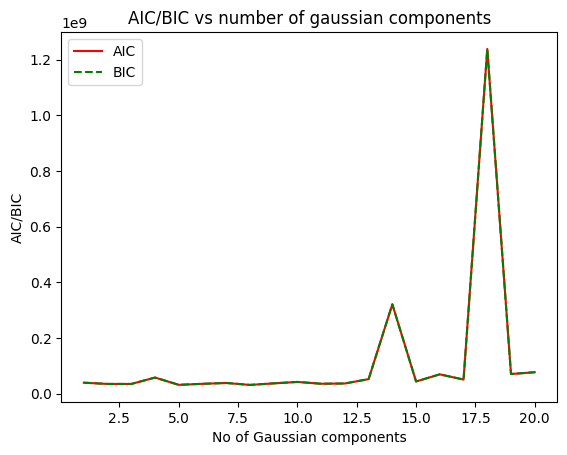


The GMM is trained.....


In [9]:
components=find_components_gmm()
gmm=GaussianMixture(n_components=components,max_iter=200,covariance_type='full')
gmm.fit(X_fraud)
print("\nThe GMM is trained.....")

### **Training the optimal KMeans model over the Legit data**

- Here the graph doesn't have a distinct knee point but careful observation suggests that it lies in the 20-30 range and so 25 is chosen as the optimal count and model is trained.

100%|██████████| 49/49 [01:41<00:00,  2.07s/it]


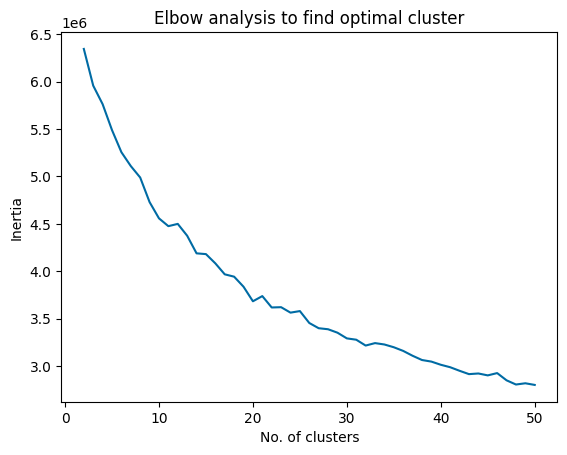


Kmeans model over Legit transaction data is trained.....


In [10]:
optimal_k()
kmm=KMeans(n_clusters=25).fit(X_legit)
print("\nKmeans model over Legit transaction data is trained.....")


### **Data Augmentation: Complete Oversampling using GMM**


- Here the fraud data is upsampled such that the total number of fraud and legit transactions in dataset is same. However a huge amount of data is augmented and hence might lead to overfitting and capturing of noise from the fraud data.

- The GMM is just a stochastic equation formed by the summation of different Gaussian components. 
- Hence, sampling from it means we are drawing new points according to the learned probability distribution, where each sample is generated from one of the Gaussian components based on its assigned weight.  
$$
p(x) = \sum_{k=1}^{K} \pi_k \, \mathcal{N}(x \mid \mu_k, \Sigma_k)
$$

where:  
- $\pi_k$ = mixing coefficient (weight) of the $k^{th}$ Gaussian, with $\sum_{k=1}^K \pi_k = 1$.  
- $\mu_k$ = mean vector of the $k^{th}$ Gaussian.  
- $\Sigma_k$ = covariance matrix of the $k^{th}$ Gaussian.  
- $\mathcal{N}(x \mid \mu_k, \Sigma_k)$ = multivariate normal distribution for component k.  

**In short:** Sampling from a GMM generates synthetic points that follow the **overall probability distribution** of the minority class, making them more realistic than points created by simple interpolation methods.  



In [11]:
samples,_=gmm.sample(len(train_df)- 2*len(X_fraud))
samples=np.hstack((samples,np.ones_like(samples[:,0].reshape(-1,1))))

over_sampled_df=pd.concat((train_df,pd.DataFrame(samples,columns=df.columns)),ignore_index=True)
print("\nThe size of oversampled df is ", len(over_sampled_df))
print("\nNo: of Fraud data: ",over_sampled_df['Class'].value_counts()[1])
print("\nNo: of Non-Fraud data: ",over_sampled_df['Class'].value_counts()[0])


The size of oversampled df is  454904

No: of Fraud data:  227452

No: of Non-Fraud data:  227452


### **Balanced Oversampling using GMM and Undersampling using KMeans clustering**

- Here the total number of datapoints is determined to be 20,000. This choice is because, the fraud data, which was initially round 400 when upsampled to 20 times seems to be the right choice to prevent overfitting and generation of noise from fraud data
- So, The upsampled data count is determined to be 8,000 and I wanted this to be 40% of total augmented data. Hence the number 20,000 is chosen. 
- The reason to have 40% of whole data to be fraud instead of 50% is to feed the model the information that fraud transactions are not that often as legit transactions.

In [16]:
from collections import Counter


total_size=20000
undersample_size= int(0.6*total_size)
oversample_size= int(0.4*total_size)

labels=kmm.labels_
cluster_count=Counter(labels)

undersampled_X_legit=[]

for cluster,count in cluster_count.items():

    n_samples=int(count/len(labels)*undersample_size)
    indices=np.where(labels==cluster)[0]
    
    undersampled_indices=np.random.choice(indices,size=n_samples,replace=False)

    undersampled_X_legit.extend(X_legit.values[undersampled_indices]) # X_legit.values to convert it to np array

undersampled_X_legit=np.array(undersampled_X_legit)
print("The Legit transaction data is undersampled and the size is",len(undersampled_X_legit))

undersampled_legit_df=np.hstack((undersampled_X_legit,np.zeros_like(undersampled_X_legit[:,0].reshape(-1,1))))
undersampled_legit_df=pd.DataFrame(undersampled_legit_df,columns=df.columns)

print("\n The undersampled Legit data is ready.....")






oversampled_X_fraud,_=gmm.sample(oversample_size-len(X_fraud))
print("\nThe Fraud transaction data is oversampled... and the size is",len(oversampled_X_fraud)+len(X_fraud))

oversampled_X_fraud=np.vstack((X_fraud.values,oversampled_X_fraud))
oversampled_fraud_df=np.hstack((oversampled_X_fraud,np.ones_like(oversampled_X_fraud[:,0].reshape(-1,1))))
oversampled_fraud_df=pd.DataFrame(oversampled_fraud_df,columns=df.columns)

augmented_df=pd.concat([undersampled_legit_df,oversampled_fraud_df],ignore_index=True)

print("\nThe final balanced dataset is ready..... and the size is ",len(augmented_df))



The Legit transaction data is undersampled and the size is 11988

 The undersampled Legit data is ready.....

The Fraud transaction data is oversampled... and the size is 8000

The final balanced dataset is ready..... and the size is  19988


## PART C: Evaluation

### **1.Evaluation over raw imbalanced data**


Training and evaluation initiated for  Raw imbalanced data  .....


Accuracy: 0.9990871107053826

Precision: 0.9122807017543859

Recall: 0.5252525252525253

F1 score: 0.6666666666666666

ROC AUC Score: 0.9564288578058515


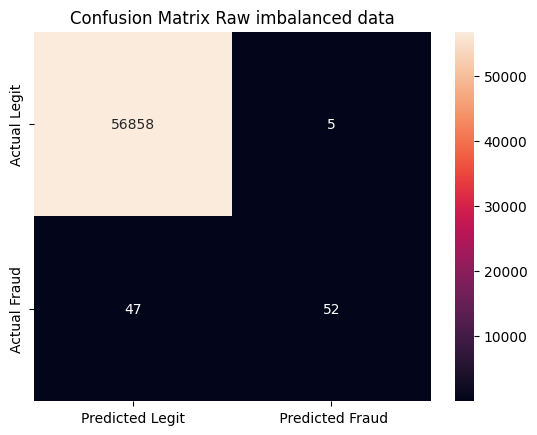

In [50]:
model_evaluation(X_train,Y_train,X_test,Y_test,"Raw imbalanced data")
    


### **2. Evaluation over oversampled data using GMM**


Training and evaluation initiated for  Fully Oversampled data  .....


Accuracy: 0.9809873248832555

Precision: 0.07512953367875648

Recall: 0.8787878787878788

F1 score: 0.13842482100238662

ROC AUC Score: 0.9562975835771854


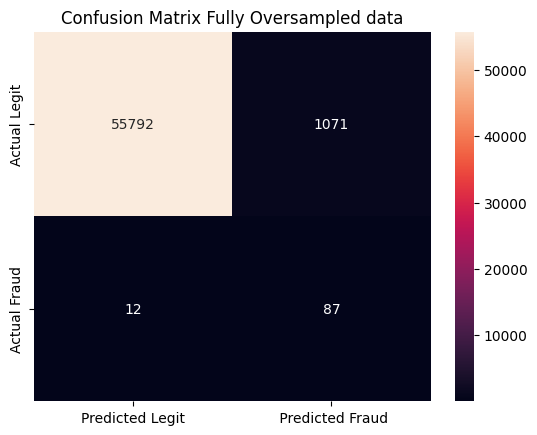

In [51]:
model_evaluation(over_sampled_df.drop(columns="Class"),over_sampled_df["Class"],X_test,Y_test,"Fully Oversampled data")


### **3. Evaluation over balanced augmented data**


Training and evaluation initiated for  Balanced and Augmented Data  .....


Accuracy: 0.9861311049471577

Precision: 0.09872241579558652

Recall: 0.8585858585858586

F1 score: 0.17708333333333334

ROC AUC Score: 0.9614469439839188


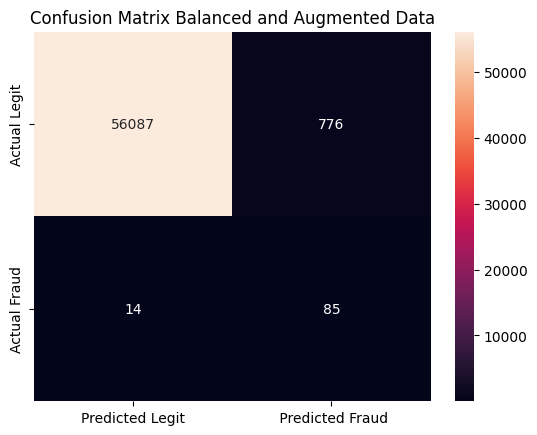

In [52]:
model_evaluation(augmented_df.drop(columns="Class"),augmented_df["Class"],X_test,Y_test,"Balanced and Augmented Data")


          Model     Score     Metric
0    Unbalanced  0.999087   Accuracy
1   Oversampled  0.980987   Accuracy
2       GMM+CBU  0.986131   Accuracy
3    Unbalanced  0.912281  Precision
4   Oversampled  0.075130  Precision
5       GMM+CBU  0.098722  Precision
6    Unbalanced  0.525253     Recall
7   Oversampled  0.878788     Recall
8       GMM+CBU  0.858586     Recall
9    Unbalanced  0.666667         F1
10  Oversampled  0.138425         F1
11      GMM+CBU  0.177083         F1
12   Unbalanced  0.762582    ROC-AUC
13  Oversampled  0.929977    ROC-AUC
14      GMM+CBU  0.922470    ROC-AUC


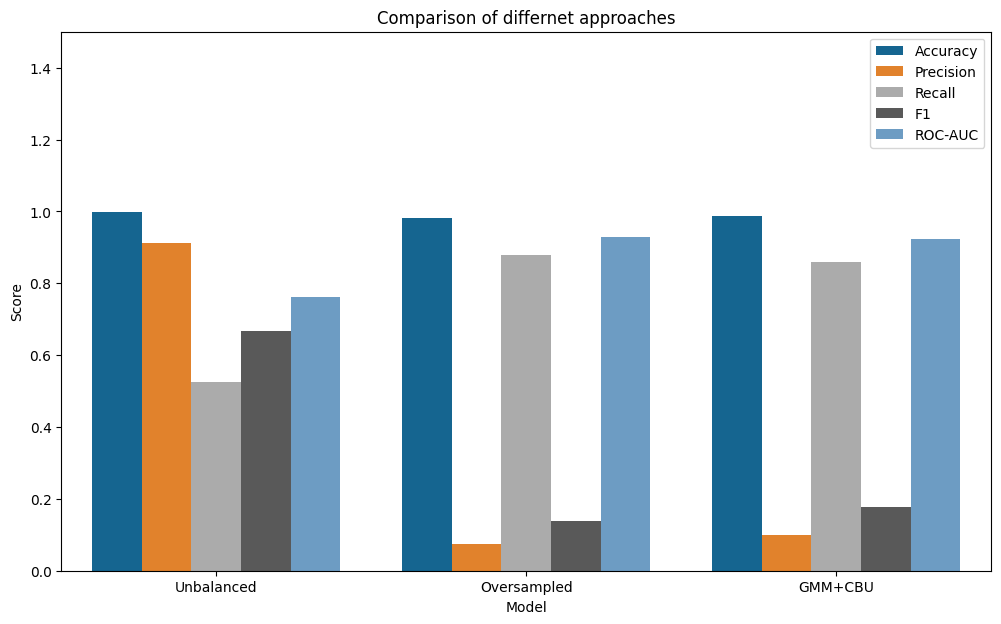

In [61]:
model=["Unbalanced", "Oversampled", "GMM+CBU"]
metric=["Accuracy","Accuracy","Accuracy","Precision","Precision","Precision","Recall","Recall","Recall","F1","F1","F1","ROC-AUC","ROC-AUC","ROC-AUC"]
summary=pd.DataFrame({"Model":model*5, "Score":acc+pres+recall+f1+auc,"Metric":metric})
print(summary)


plt.figure(figsize=(12,7))
sns.barplot(x="Model",y="Score",data=summary,hue="Metric",)
plt.title("Comparison of differnet approaches")
plt.ylim(0,1.5)
plt.legend()
plt.show()

## **Conclusion  **

- **Theoretical Motivation**  
  - Class imbalance severely biases classifiers toward the majority class; hence accuracy is misleading. Metrics like precision, recall, and F1-score are more meaningful for fraud detection.  
  - SMOTE and random oversampling generate synthetic points without modeling the underlying data distribution, which can lead to noisy or unrealistic samples.  
  - Gaussian Mixture Models (GMMs), being probabilistic and density-based, can capture multi-modal structures and complex feature space shapes in the minority class. This allows for more realistic synthetic samples that preserve the statistical properties of fraud transactions.  
  - Clustering-Based Undersampling (CBU) complements GMM oversampling by pruning redundant majority points, maintaining diversity while reducing imbalance.  

- **Baseline (Raw Data)**  
  - Accuracy was high (~99.9%) but misleading due to imbalance.  
  - Precision was strong (~0.91) but recall was low (~0.52), meaning the model identified only half of fraud cases.  
  - As expected, the classifier favored the majority class, achieving high precision at the cost of missing many fraudulent transactions.  

- **Fully Oversampled with GMM**  
  - Recall surged (~0.87), showing GMM successfully generated realistic minority samples and forced the model to capture fraud patterns.  
  - Precision dropped drastically (~0.07), indicating the model started misclassifying many legitimate transactions as fraudulent.  
  - F1-score was lower compared to baseline (~0.13 vs. ~0.67), reflecting the tradeoff: better fraud detection but at the cost of too many false alarms.  
  - This behavior was expected because oversampling strongly biases the model toward the minority, improving sensitivity but sacrificing specificity.  

- **Balanced with GMM + CBU**  
  - Recall remained high (~0.86), showing good minority coverage.  
  - Precision improved compared to oversampling alone (~0.09 vs. ~0.07), because CBU reduced redundant legitimate samples and balanced class distributions more cleanly.  
  - F1-score was the highest among augmented models (~0.18), reflecting a better balance between recall and precision.  
  - ROC AUC improved slightly (~0.961 vs. ~0.956), showing the classifier gained overall discriminative ability.  

---
  - GMM-based oversampling succeeded in improving recall significantly, which is critical for fraud detection, since missing fraudulent transactions is costlier than false alarms.  
  - However, the drop in precision highlights the tradeoff: more frauds were caught, but at the cost of flagging too many genuine transactions.  
  - Adding CBU helped recover some precision while maintaining recall, resulting in the best overall F1 and AUC performance.  


  - For fraud detection, recall is often prioritized over precision, making GMM-based synthetic sampling effective despite lower precision.  
  - The GMM + CBU pipeline offered the best balance, mitigating the extreme drop in precision while preserving recall gains.  
  - Overall,*probabilistic GMM oversampling is superior to naive methods as it models the minority distribution more faithfully, and when combined with CBU, it provides a practical way to handle imbalance in real-world fraud detection.  
